# optimade-python-tools tutorial

This tutorial notebook provides some worked examples of some common workflows using the [`optimade-python-tools`](https://github.com/Materials-Consortia/optimade-python-tools) package.

We will cover:

- querying OPTIMADE APIs with `optimade.client.OptimadeClient`
- converting to common formats like ASE and pymatgen
- creating secondary databases that also follow the OPTIMADE format.

As always, let us start by installing some dependencies from PyPI:

In [1]:
%pip install 'optimade[http_client]>=0.22.1' 
%pip install pymatgen ase ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Querying OPTIMADE APIs

As you have probably heard, the OPTIMADE consortium provides a way of registering an OPTIMADE API at https://github.com/Materials-Consortia/providers. 
We can use this list to automatically query all known provider by default.

Let's start with some of the queries from the other exercises, e.g., finding all structures of SiO$_2$.

In [2]:
from optimade.client import OptimadeClient

We can exclude particular providers from a query using their short-code or base URL from the OPTIMADE providers list. For e.g., lets exclude Materials Cloud for now:

In [5]:
client = OptimadeClient(exclude_providers=["mcloud"], use_async=False)

In [6]:
results = client.get(filter='chemical_formula_reduced="O2Si"')

Output()

╭─────────────────────────────────────────────────────────────────────╮
│ Performing query structures/?filter=chemical_formula_reduced="O2Si" │
╰─────────────────────────────────────────────────────────────────────╯

Error: Provider 'https://www.crystallography.net/cod/optimade' returned: 501 - 
https://www.crystallography.net/cod/optimade/v1/structures?filter=chemical_formula_reduced=%22O2Si%22: 501 Not 
Implemented: queries are not supported for 'chemical_formula_reduced'

Error: Provider 'https://www.crystallography.net/tcod/optimade' returned: 501 - 
https://www.crystallography.net/tcod/optimade/v1/structures?filter=chemical_formula_reduced=%22O2Si%22: 501 Not 
Implemented: queries are not supported for 'chemical_formula_reduced'

In [7]:
print(client.all_results.keys())
print("\t", client.all_results["structures"].keys())
print("\t\t", client.all_results["structures"]['chemical_formula_reduced="O2Si"'].keys())

dict_keys(['structures'])
	 dict_keys(['chemical_formula_reduced="O2Si"'])
		 dict_keys(['http://aflow.org/API/optimade/', 'https://www.crystallography.net/cod/optimade', 'https://optimade.materialsproject.org', 'https://api.mpds.io', 'https://nomad-lab.eu/prod/rae/optimade/', 'https://optimade.odbx.science', 'https://optimade-misc.odbx.science', 'http://optimade.openmaterialsdb.se', 'http://oqmd.org/optimade/', 'https://www.crystallography.net/tcod/optimade', 'http://optimade.2dmatpedia.org'])


In [8]:
client.all_results["structures"]['chemical_formula_reduced="O2Si"']["https://optimade-misc.odbx.science"].meta

{'query': {'representation': '/structures?filter=chemical_formula_reduced%3D%22O2Si%22&page_offset=560'},
 'api_version': '1.1.0',
 'more_data_available': False,
 'schema': 'https://schemas.optimade.org/openapi/v1.1.0/optimade.json',
 'time_stamp': '2023-02-28T01:15:22Z',
 'data_returned': 579,
 'provider': {'name': 'Open Database of Xtals',
  'description': 'This particular database hosts a series of miscellaneous datasets.',
  'prefix': 'odbx',
  'homepage': 'https://odbx.science'},
 'data_available': 413559,
 'implementation': {'name': 'optimade-python-tools (modified for odbx.science)',
  'version': '0.1',
  'source_url': 'https://github.com/ml-evs/optimade-misc-datasets',
  'maintainer': {'email': 'web@odbx.science'},
  'issue_tracker': 'https://github.com/ml-evs/optimade-misc-datasets/issues'}}

In [11]:
# Integration with ASE

# Lets convert all the results from optimade-misc into ASE atoms objects
from optimade.adapters import Structure

structures = client.all_results["structures"]['chemical_formula_reduced="O2Si"']["https://optimade-misc.odbx.science"].data

atoms = [Structure(s).as_ase for s in structures]

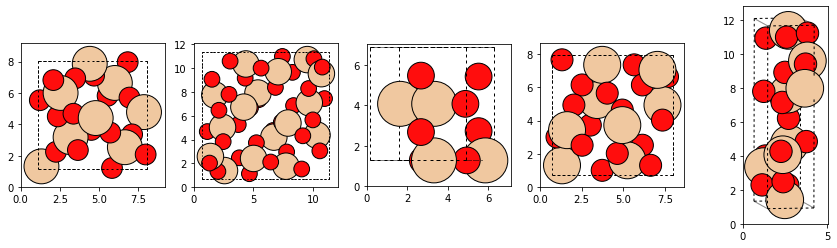

In [21]:
from ase.visualize.plot import plot_atoms
import random
import matplotlib.pyplot as plt

N = 5
fig, ax = plt.subplots(1, N, figsize=(N*3, 4))

for ind, at in enumerate(random.sample(atoms, N)):
  plot_atoms(at, ax=ax[ind])

## Additional tasks

1. Write a callback to save the results of a query to a file and execute it on a query of your choice.

2. How about the same, but saving to a database rather than a file? In order to do this in Colab, you may want to make use of mongomock.

3. How about a pipeline that can start where it left off, without needing to redownload all the results?

4. Using all of the above, can you serve the results of a query of your choice from your own OPTIMADE API locally?

5. Can you add custom properties to that database, e.g., ASE EMT energies?